In [1]:
%matplotlib inline

import io, os, sys, types, datetime, pickle, warnings, time

warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

import numpy as np
from numpy.linalg import eig, inv

import math

from scipy import interpolate, spatial, stats

import seaborn as sns

import skimage.io as skiIo
from skimage import exposure, img_as_float, filters, morphology, transform

from sklearn import linear_model
from sklearn import metrics

In [2]:
""" ============== path settings =============="""

' ============== path settings =============='

In [3]:
module_path = os.path.join(os.path.dirname(os.getcwd()), 'python_cluster', 'functions')

In [4]:
module_path

'/Users/lily/Lily/Academic/AW_Lab/code/NSP_extension/python/python_cluster/functions'

In [5]:
# env = 'Windows'
# if(env == 'Windows'):
#     module_path = 'W:\\2019_09_NSP_Extension\\code\\NSP_codes\\python_cluster\\helper_functions'
# elif(env == 'Mac'):
#     module_path = '/Users/lily/Lily/Academic/AW_Lab/code/python_cluster/helper_functions'

In [6]:
# Mac, Figure_Output1, Data_Output1, Ctrl_24hrs_Gal80_s3r1_annotation.csv, 1, 1, 24, 6, 20, 5, 1, checking


In [8]:
### import custom functions
if module_path not in sys.path:
    sys.path.append(module_path)
import settings as settings
import helper as my_help
import intensity_calculation as my_int
import parse_bundle as my_pb
import plotting as my_plot

Mac, Figure_Output1, Data_Output1, Ctrl_24hrs_Gal80_s3r1_annotation.csv, 1, 1, 24, 6, 20, 5, 1, checking
Mac, Figure_Output1, Data_Output1, Ctrl_24hrs_Gal80_s3r1_annotation.csv, 1, 1, 24, 6, 20, 5, 1, checking


In [9]:
paths = settings.paths
matching_info = settings.matching_info
analysis_params_general = settings.analysis_params_general

In [10]:
matching_info.channel_mapping

{0: 'RFP', 1: 'GFP', 2: '24b10', 3: 'FasII'}

In [11]:
"""============== main =============="""

'============== main =============='

In [12]:
sns.set_style("dark")

In [13]:
paths.annot_path

'/Users/lily/Lily/Academic/AW_Lab/data/Gal80_data/Annotations/Ctrl/24/Ctrl_24hrs_Gal80_s3r1_annotation.csv'

In [38]:
"""Load data"""
### load summaries
summary_df = pd.read_csv(paths.annot_path)
image_list = summary_df.loc[:,'Image_Name'].unique()
ROI_list = summary_df.loc[:,'ROI_Name'].unique()

In [39]:
image_list, ROI_list

(array(['Ctrl80_24hrs_smp3_region1.tif'], dtype=object),
 array(['Ctrl80_24hrs_smp3_region1_ROI_2020331_152549.csv'], dtype=object))

In [40]:
i_image = 0

In [41]:
### load other data
image_name = image_list[i_image]
roi_name = ROI_list[i_image]
roi_df = pd.read_csv(os.path.join(paths.roi_path, roi_name))
roi_df.rename(columns = {' ':'No'}, inplace = True)
annot_df = summary_df.groupby(['Image_Name']).get_group(image_list[i_image]).reset_index(drop = True)
m2p_ratio = (summary_df.iloc[0]['imgX_pixel']/summary_df.iloc[0]['imgX_um'], summary_df.iloc[0]['imgY_pixel']/summary_df.iloc[0]['imgY_um'])

In [42]:
""" Process annotation info"""
is_extended_target_list = False
annotation_type = annot_df.loc[0,'Annotation_type']
if(annotation_type == 1):
    bundles_df = my_pb.get_bundles_info_v1(roi_df, annot_df, m2p_ratio[0], m2p_ratio[1], is_extended_target_list)
if(annotation_type == 2):
    bundles_df = my_pb.get_bundles_info_v2(roi_df, annot_df, m2p_ratio[0], m2p_ratio[1], is_extended_target_list)
if(annotation_type == 3):
    bundles_df = my_pb.get_bundles_info_v4(roi_df, annot_df, m2p_ratio[0], m2p_ratio[1], is_print = True)
annot_bundles_df = bundles_df.dropna(axis=0, how='any', inplace = False)
annot_bundles_df.sort_index(inplace = True)

1 7
1: bundle!
2 7
2: bundle!
3 7
3: bundle!
4 7
4: bundle!
5 7
5: bundle!
6 7
6: bundle!
7 7
7: bundle!
8 7
8: bundle!
9 7
9: bundle!
10 7
10: bundle!
11 7
11: bundle!
12 7
12: bundle!
13 7
13: bundle!
14 7
14: bundle!
15 7
15: bundle!
16 7
16: bundle!
17 7
17: bundle!
18 7
18: bundle!
19 7
19: bundle!
20 7
20: bundle!
21 7
21: bundle!
22 7
22: bundle!
23 7
23: bundle!
24 7
24: bundle!
25 7
25: bundle!
26 7
26: bundle!
27 7
27: bundle!
28 7
28: bundle!
29 7
29: bundle!
30 7
30: bundle!
31 7
31: bundle!
32 7
32: bundle!
33 7
33: bundle!
34 7
34: bundle!
35 7
35: bundle!
36 7
36: bundle!
37 7
37: bundle!
38 7
38: bundle!
39 7
39: bundle!
40 7
40: bundle!
41 7
41: bundle!
42 7
42: bundle!
43 1
43: T0 of 12!
44 2
44: Target!
45 2
45: Target!
46 1
46: T0 of 11!
47 1
47: T0 of 10!
48 2
48: Target!
49 1
49: T0 of 13!
50 2
50: Target!
51 1
51: T0 of 42!
52 2
52: Target!
53 1
53: T0 of 9!
54 1
54: T0 of 40!
55 1
55: T0 of 14!
56 2
56: Target!
57 1
57: T0 of 15!
58 2
58: Target!
59 2
59: Target

In [27]:
"""load imaging data"""


'load imaging data'

In [28]:
%time image = img_as_float(skiIo.imread(os.path.join(paths.image_path, image_name)))
image_shape = (image.shape[0], image.shape[1], image.shape[2])
image_info = [image_name, image_shape, m2p_ratio]


CPU times: user 2.04 s, sys: 4.52 s, total: 6.56 s
Wall time: 11.3 s


In [29]:
""" Process images """
### number of channels
nChannels = min(image.shape)# number of channels of original image


In [30]:
matching_info.channels_type

'checking'

In [31]:
# # if not is_process_channels:
#     num_norm_channels = len(matching_info.channel_mapping_checking.keys()) # number of channels of normalized image
# else:
num_norm_channels = len(matching_info.channel_cmap.keys())
    
if(nChannels == 2):
    print("2 channels!")
    ### normalize channels
    image_norm = np.empty(image_shape + (num_norm_channels,), dtype=image[:,0,:,:].dtype, order='C')
    thr = np.zeros((2))
    
    # RFP_norm
    %time image_norm[:,:,:,0] = exposure.rescale_intensity(image[:,0,:,:], in_range = 'image', out_range='dtype')
    # GFP_norm
    %time image_norm[:,:,:,1] = exposure.rescale_intensity(image[:,1,:,:], in_range = 'image', out_range='dtype')    
    
    del image
        
elif(nChannels == 4):
    print("4 channels!")
    ### normalize channels
    if(matching_info.channels_type == 'checking'):
        image_norm = np.empty(image_shape + (num_norm_channels,), dtype=image[:,:,:,1].dtype, order='C')
        # RFP_norm
        %time image_norm[:,:,:,0] = image[:,:,:,0]
        # GFP_norm
        %time image_norm[:,:,:,1] = image[:,:,:,1]
        # 24b10
        %time image_norm[:,:,:,2] = image[:,:,:,2]
        # FasII
        %time image_norm[:,:,:,3] = image[:,:,:,3]

        del image
    elif(matching_info.channels_type == 'R3R4'):
        thr = np.zeros((2))
        image_norm = np.empty(image_shape + (num_norm_channels,), dtype=image[:,:,:,1].dtype, order='C')
        # RFP_norm
        %time image_norm[:,:,:,0] = exposure.rescale_intensity(image[:,:,:,0], in_range = 'image', out_range='dtype')
        # GFP_norm
        %time image_norm[:,:,:,1] = exposure.rescale_intensity(image[:,:,:,1], in_range = 'image', out_range='dtype')

        %time thr[0] = filters.threshold_isodata(image_norm[:,:,:,1])
        %time thr[1] = filters.threshold_mean(image_norm[:,:,:,1])

        %time gfp = transform.match_histograms(image_norm[:,:,:,1], image_norm[:,:,:,0])

        print("R3/R4 v1")
        r3_img = image_norm[:,:,:,0] - gfp
        r3_img[r3_img<0] = 0
        image_norm[:,:,:,2] = exposure.rescale_intensity(r3_img, in_range = 'image', out_range='dtype')
        r4_img = image_norm[:,:,:,0] * gfp
        image_norm[:,:,:,3] = exposure.rescale_intensity(r4_img, in_range = 'image', out_range='dtype')

        print("R3/R4 v2")
        gfp_thr = morphology.binary_opening((image_norm[:,:,:,1]>thr[0])*1)
        image_norm[:,:,:,4] = exposure.rescale_intensity(image_norm[:,:,:,0] * (1-gfp_thr), in_range = 'image', out_range='dtype')
        image_norm[:,:,:,5] = exposure.rescale_intensity(morphology.closing(image_norm[:,:,:,1]*((image_norm[:,:,:,1]>((thr[0] + thr[1])/2))*1)))

        print("R3 v3")
        my_help.print_to_log("R3 v3")
        r3_img = image_norm[:,:,:,0] - gfp*settings.analysis_params_general.scale_factor
        r3_img[r3_img<0] = 0
        image_norm[:,:,:,6] = exposure.rescale_intensity(r3_img, in_range = 'image', out_range='dtype')

        del image, gfp, r3_img, r4_img

    elif(matching_info.channels_type == 'FasII'):
        image_norm = np.empty(image_shape + (num_norm_channels,), dtype=image[:,:,:,1].dtype, order='C')
        # RFP_norm
        %time image_norm[:,:,:,0] = exposure.rescale_intensity(image[:,:,:,0], in_range = 'image', out_range='dtype')
        # GFP_norm
        %time image_norm[:,:,:,1] = exposure.rescale_intensity(image[:,:,:,1], in_range = 'image', out_range='dtype')
        # FasII norm
        %time image_norm[:,:,:,2] = exposure.rescale_intensity(image[:,:,:,3], in_range = 'image', out_range='dtype')

        %time thr = filters.threshold_otsu(image_norm[:,:,:,2])

        print("FasII intersect")
        fasii_thr = morphology.binary_opening((image_norm[:,:,:,2]>thr)*1)
        image_norm[:,:,:,3] = exposure.rescale_intensity(image_norm[:,:,:,0] * fasii_thr, in_range = 'image', out_range='dtype')
        image_norm[:,:,:,4] = exposure.rescale_intensity(image_norm[:,:,:,1] * fasii_thr, in_range = 'image', out_range='dtype')

        del image, fasii_thr

4 channels!
CPU times: user 1.18 s, sys: 2.52 s, total: 3.7 s
Wall time: 4.64 s
CPU times: user 1.03 s, sys: 3.18 s, total: 4.21 s
Wall time: 4.93 s
CPU times: user 667 ms, sys: 1.47 s, total: 2.14 s
Wall time: 3.19 s
CPU times: user 681 ms, sys: 1.19 s, total: 1.87 s
Wall time: 2.61 s


In [32]:
image_norm.shape

(135, 619, 1826, 4)

In [33]:
"""example plot"""

'example plot'

In [34]:
"""Example"""

'Example'

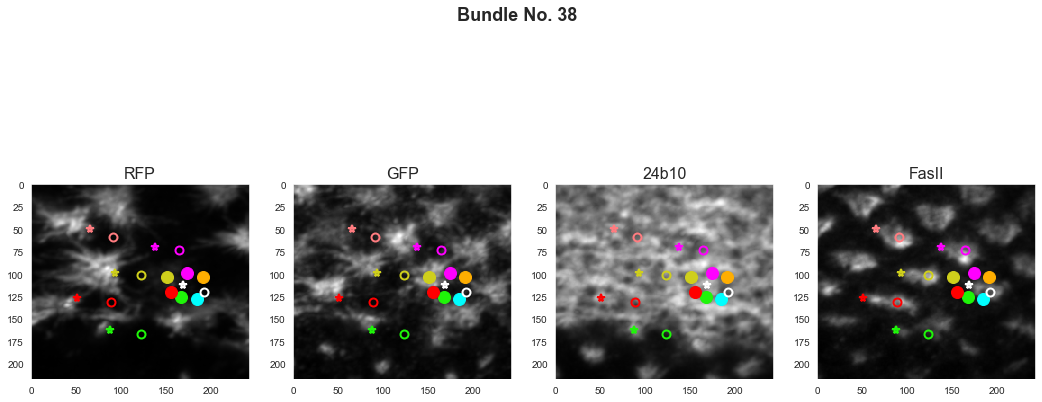

In [46]:
bundle_no = 38
plotSettings = False, False, False, True #isPlotR3Line, isPlotR4Line, isPlotR4s, isLabelOff
my_plot.plot_individual_bundles(bundle_no, bundles_df, image_norm, m2p_ratio[0], m2p_ratio[1], num_subplots = image_norm.shape[-1],
                                is_plot_r3_line = False, is_plot_r4_line = False, is_plot_r4 = False, is_label_off = True)
plt.show()

In [36]:
"""plot all"""


'plot all'

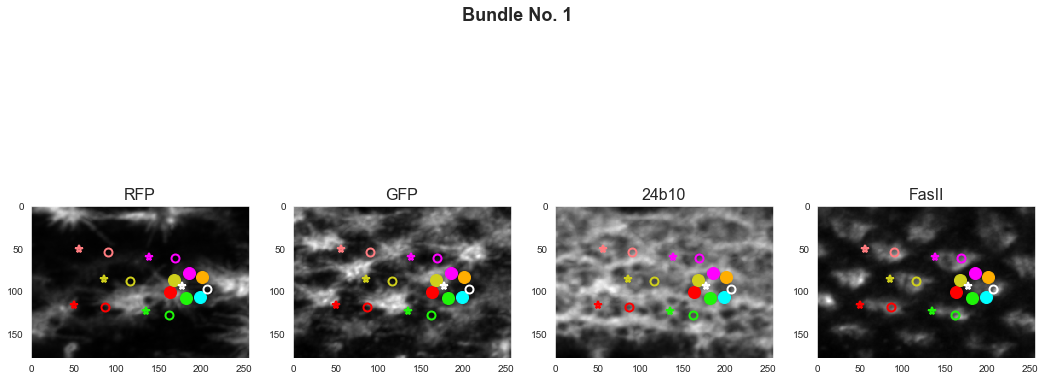

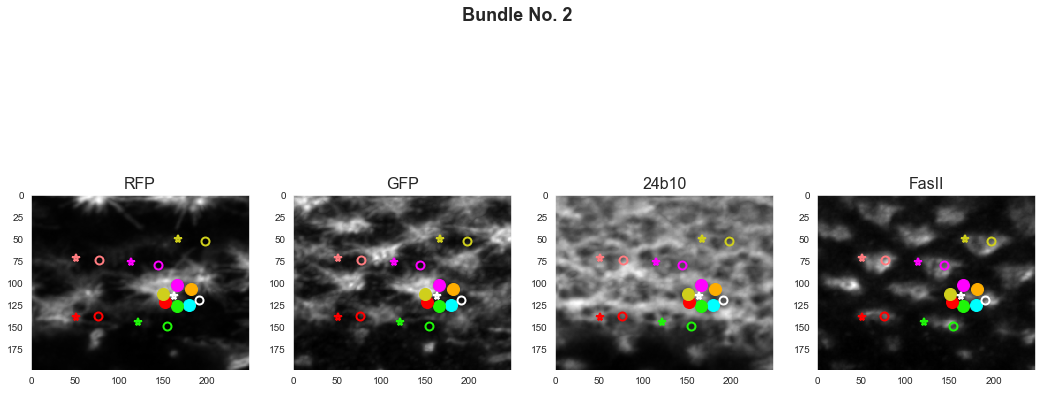

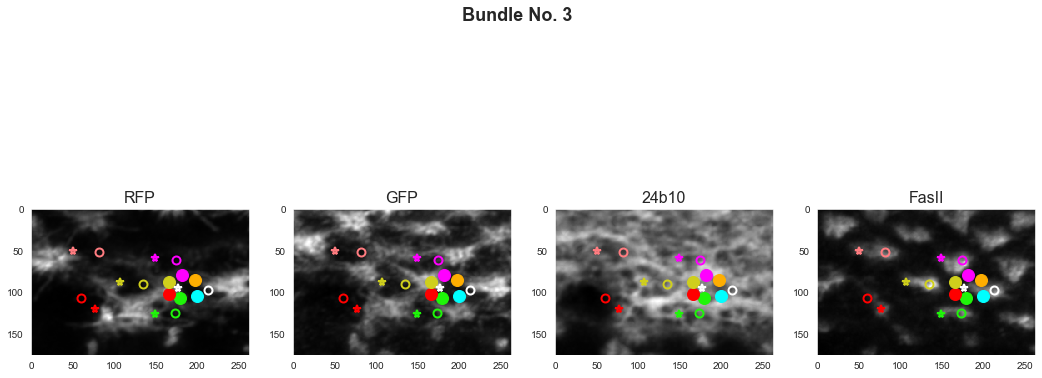

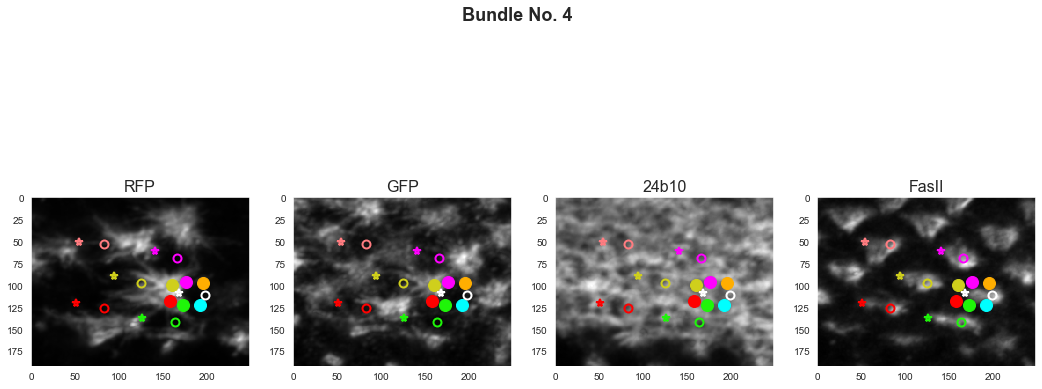

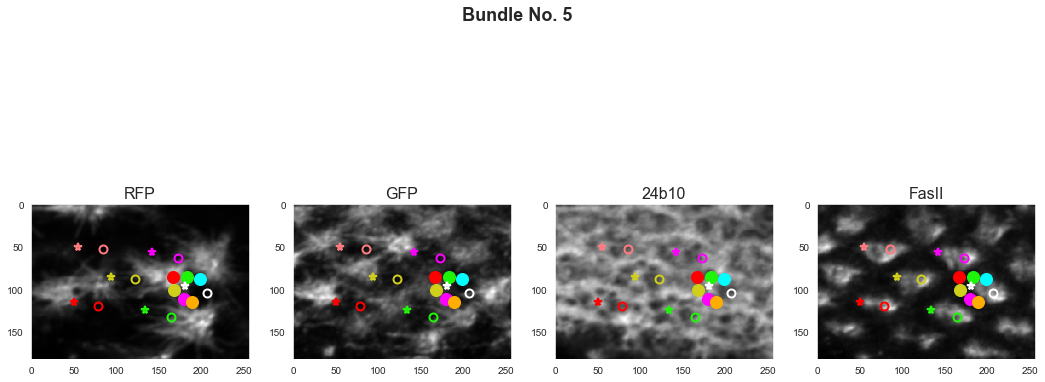

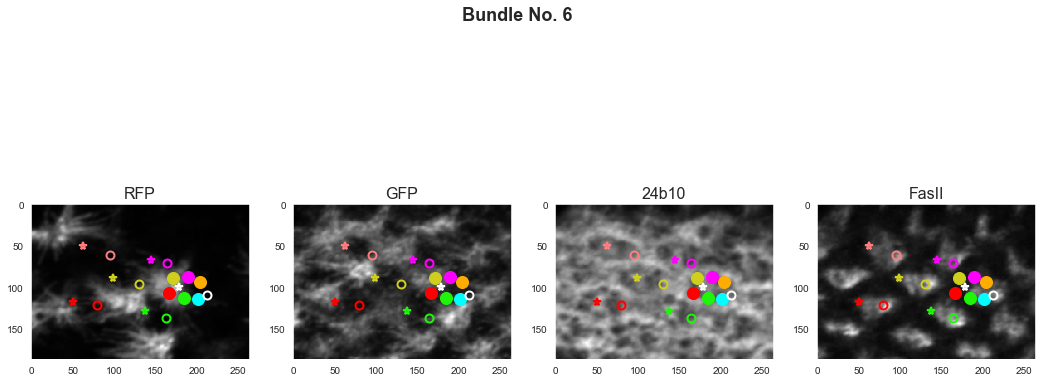

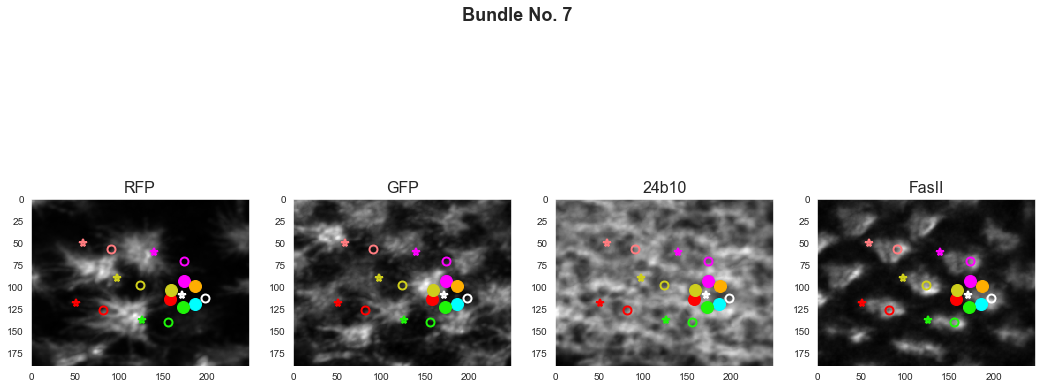

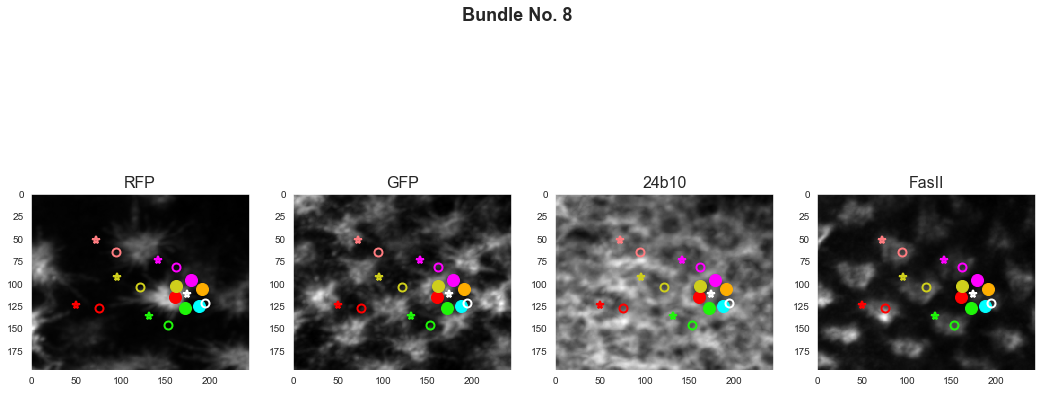

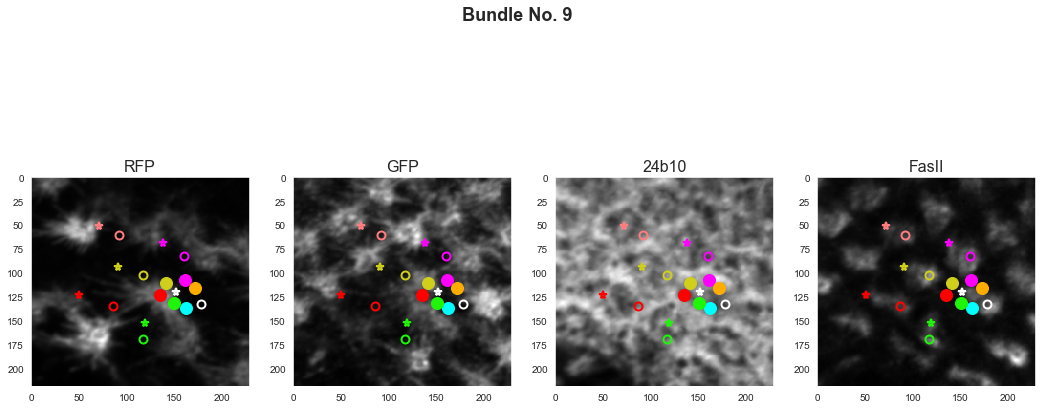

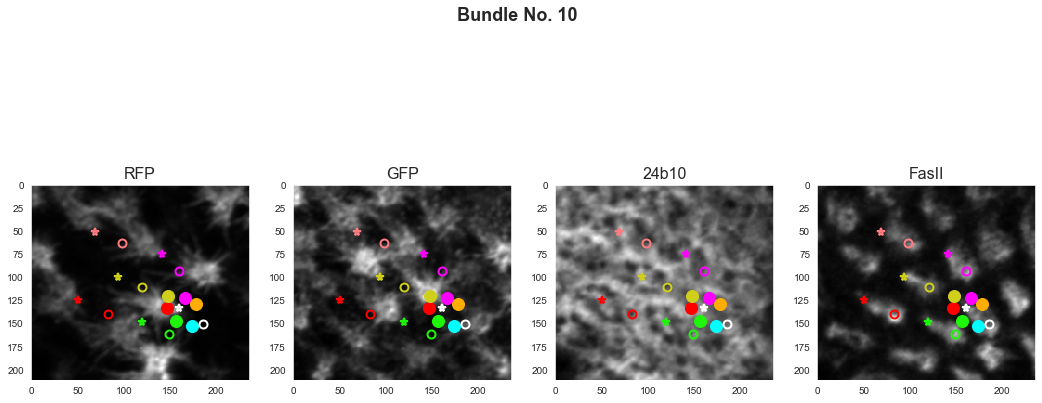

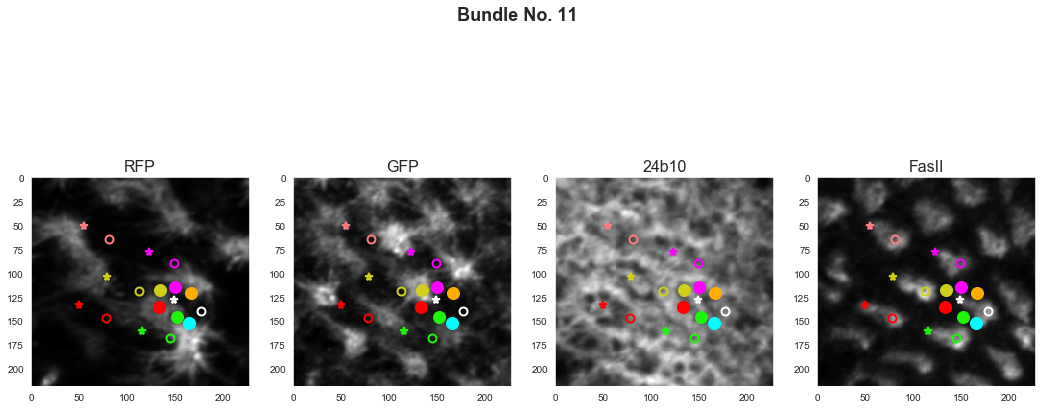

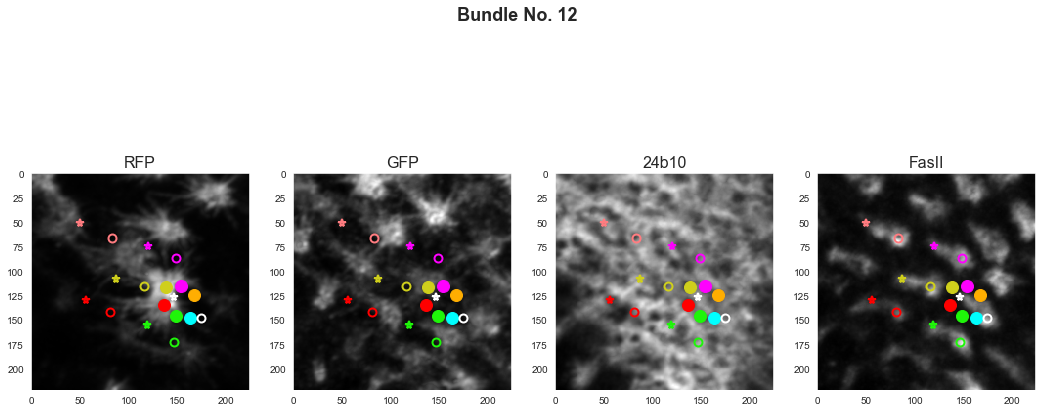

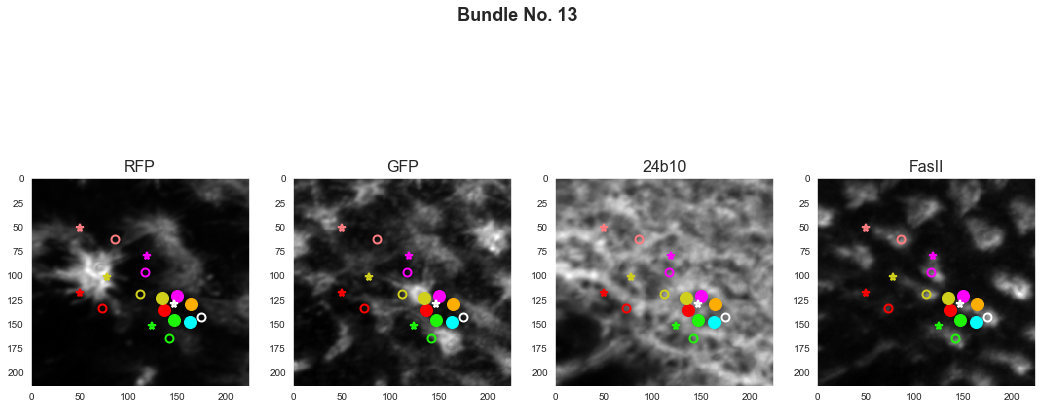

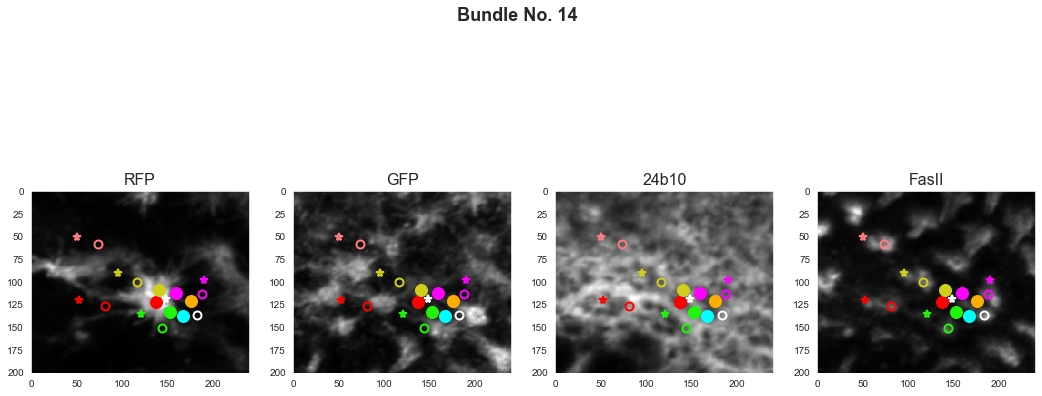

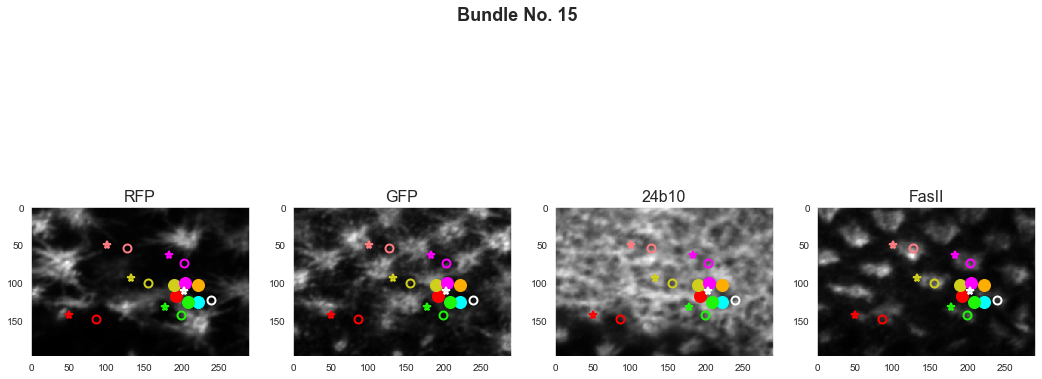

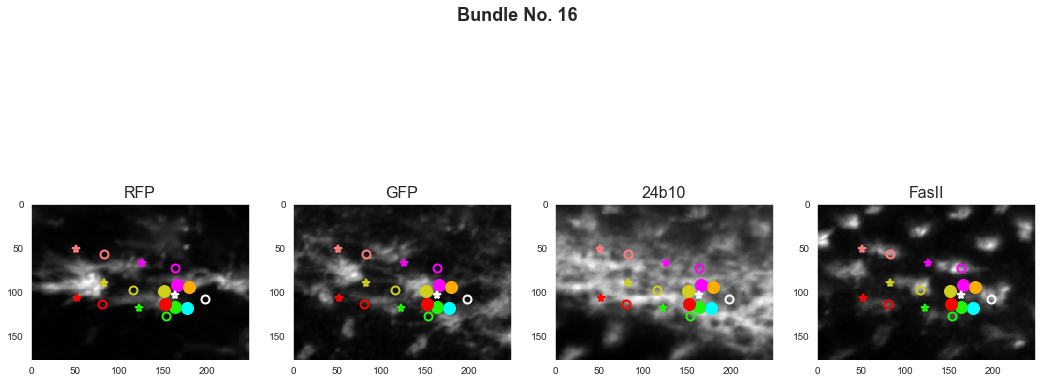

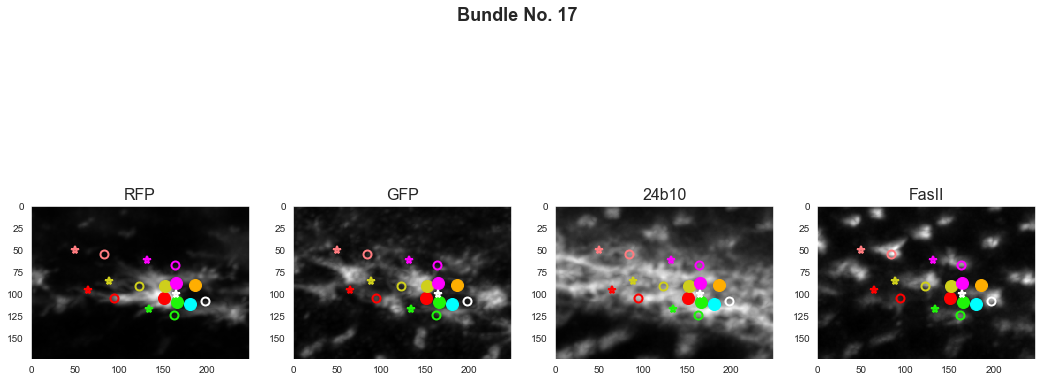

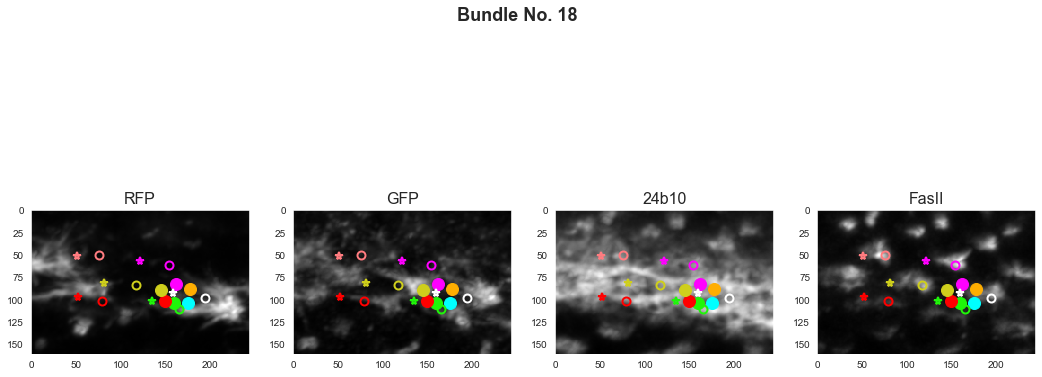

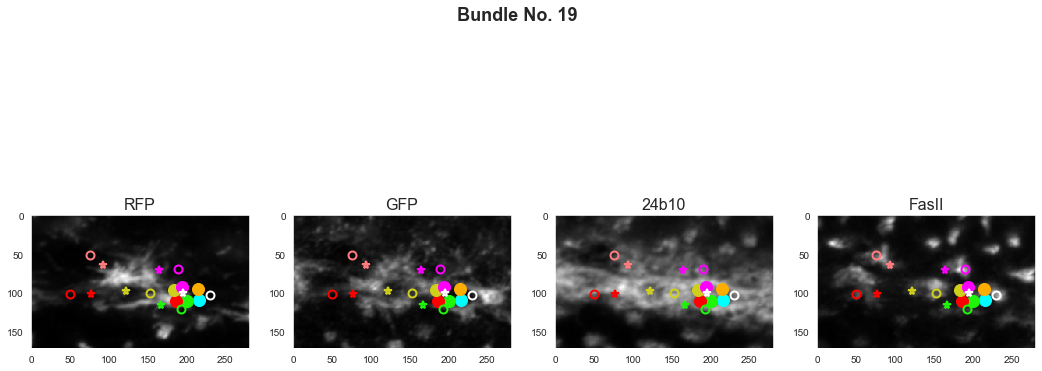

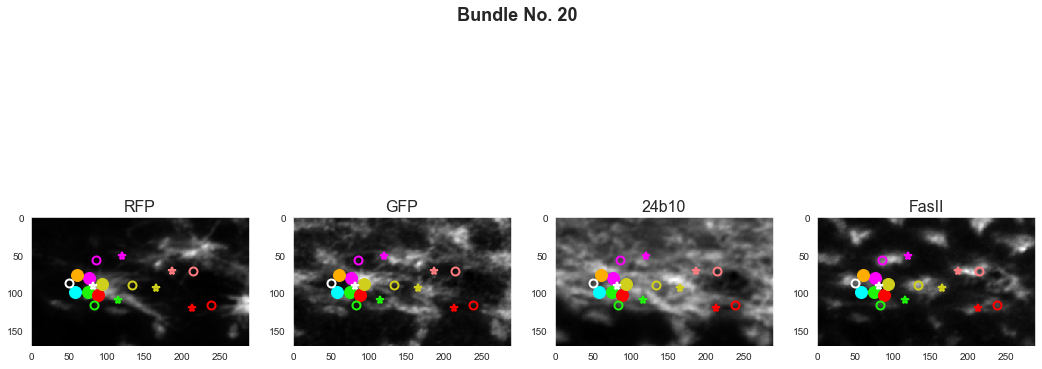

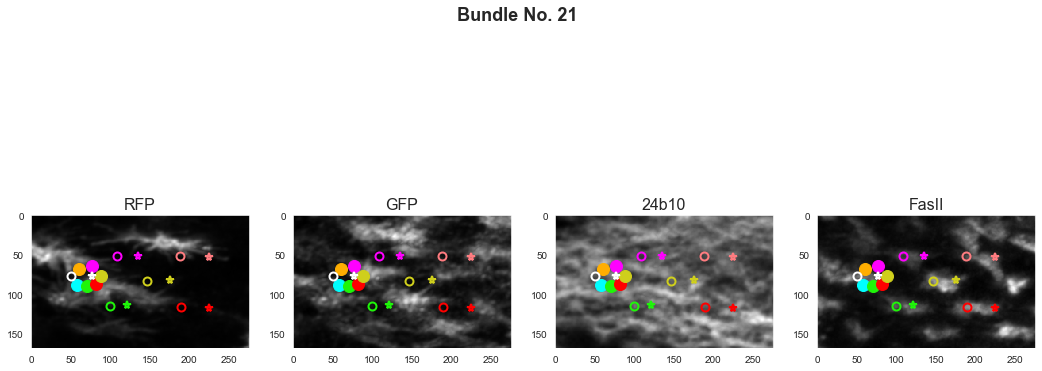

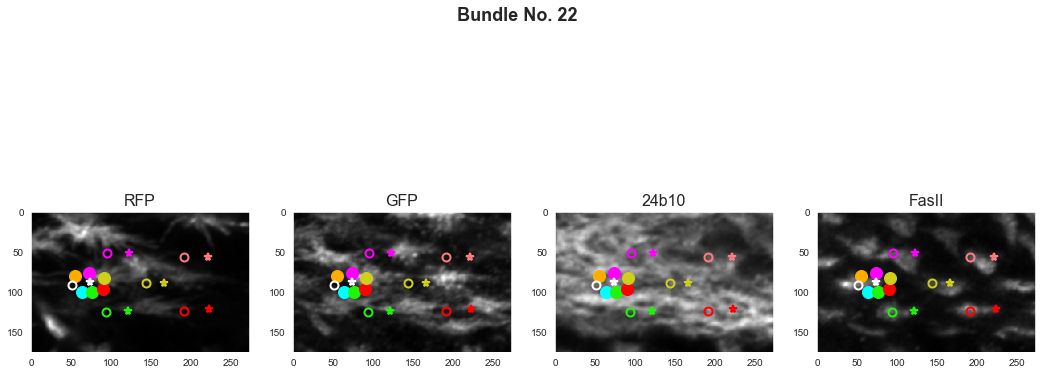

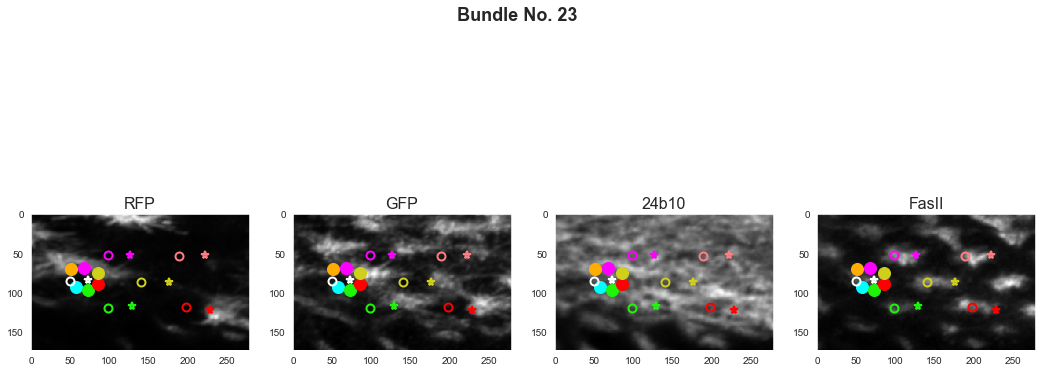

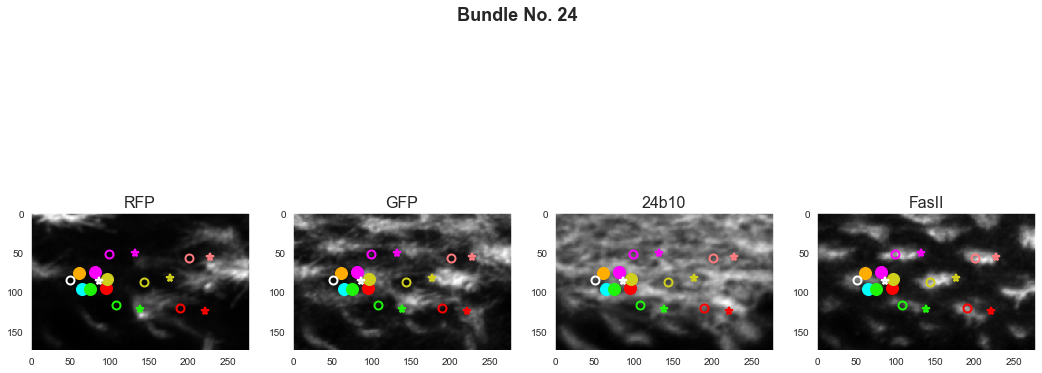

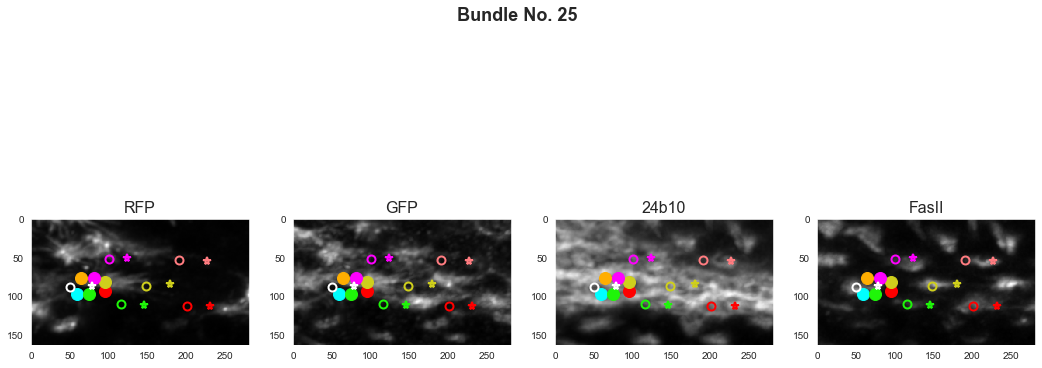

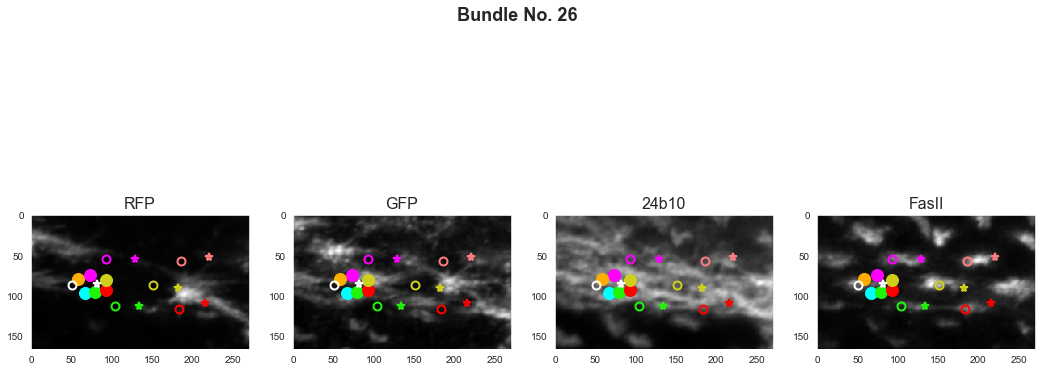

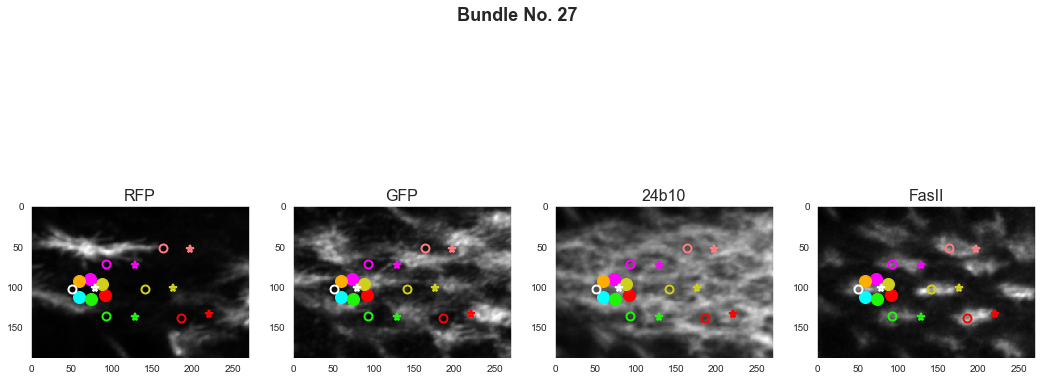

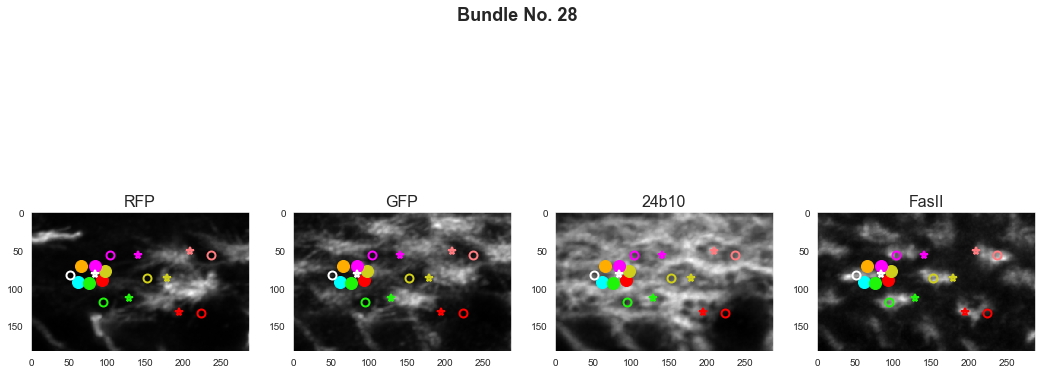

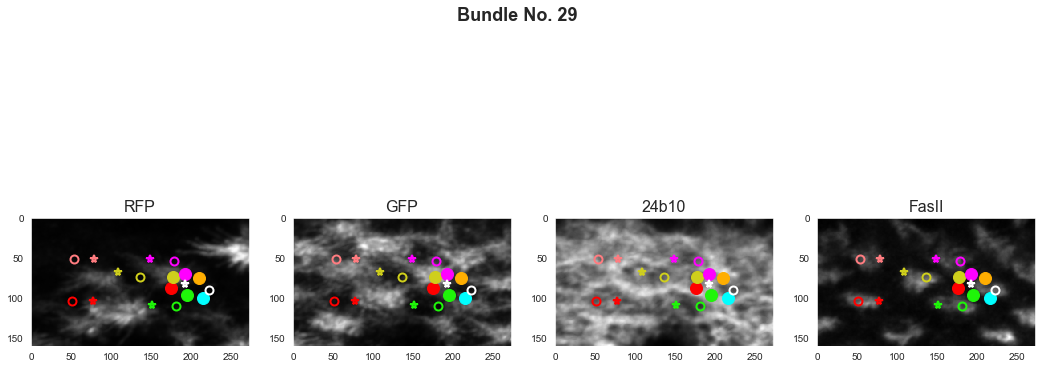

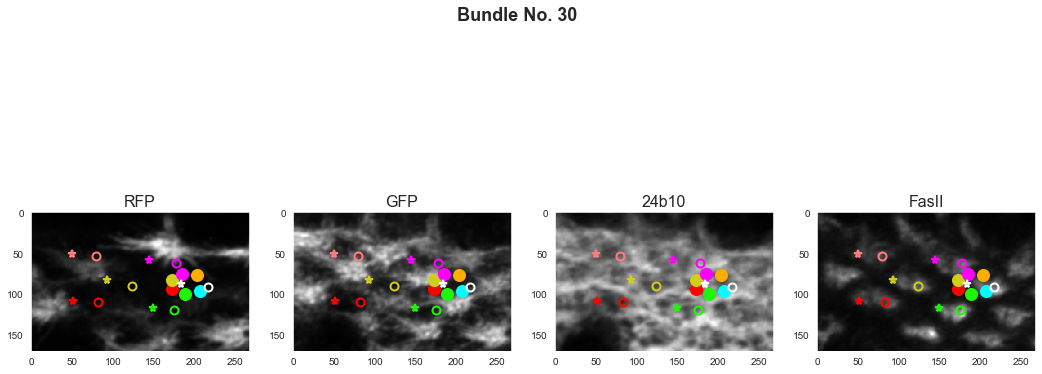

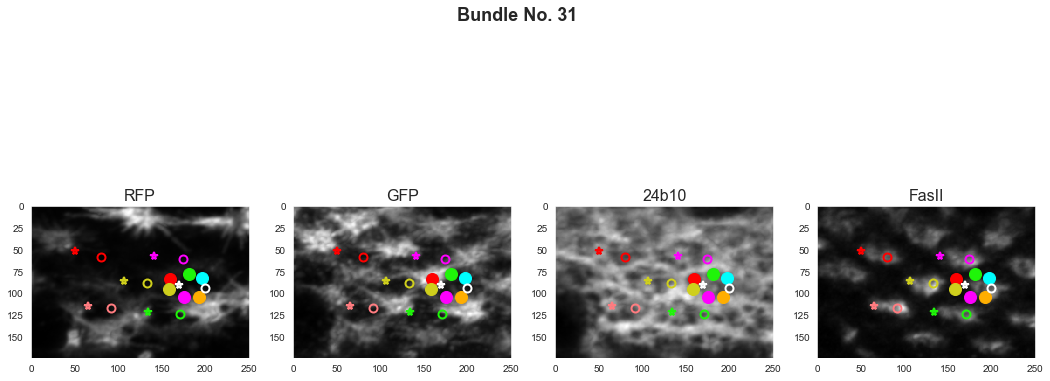

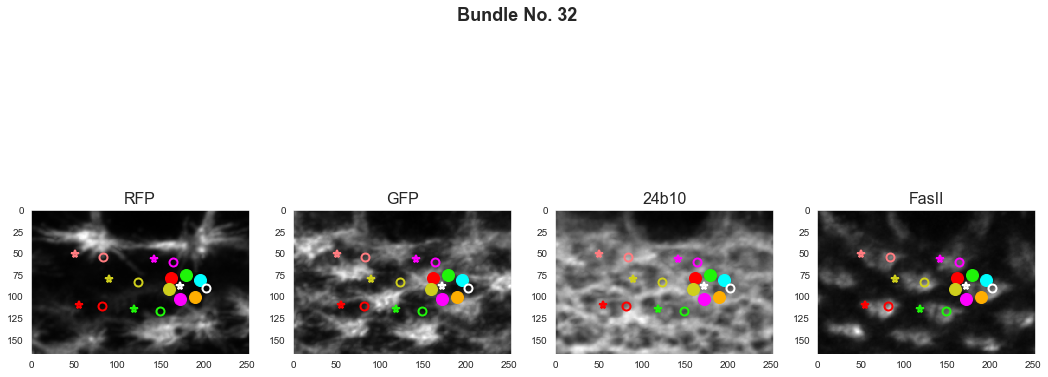

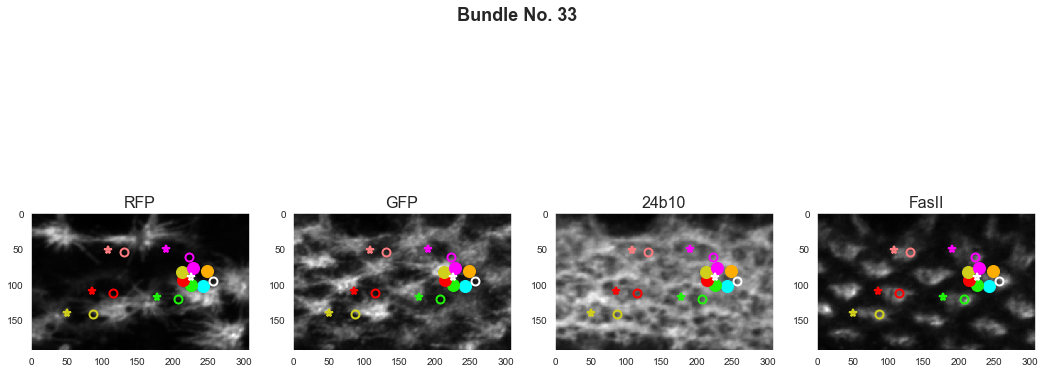

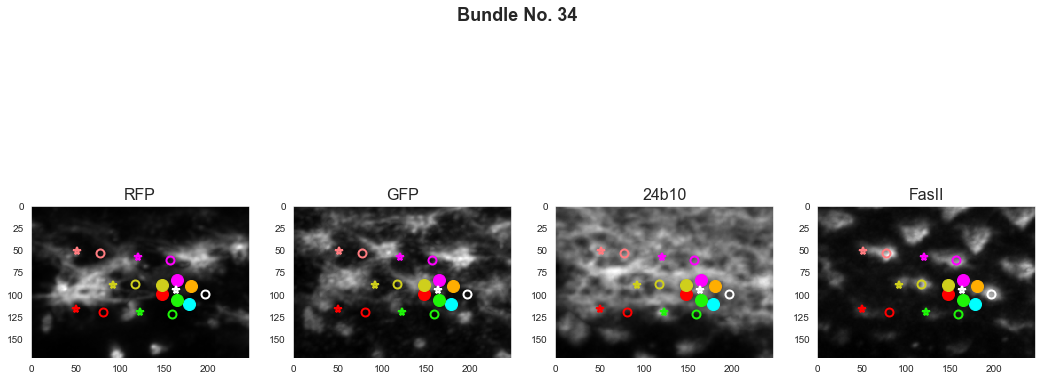

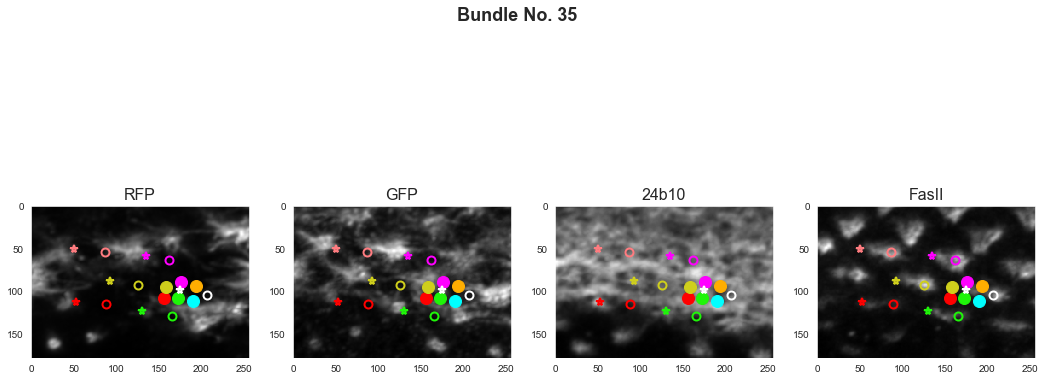

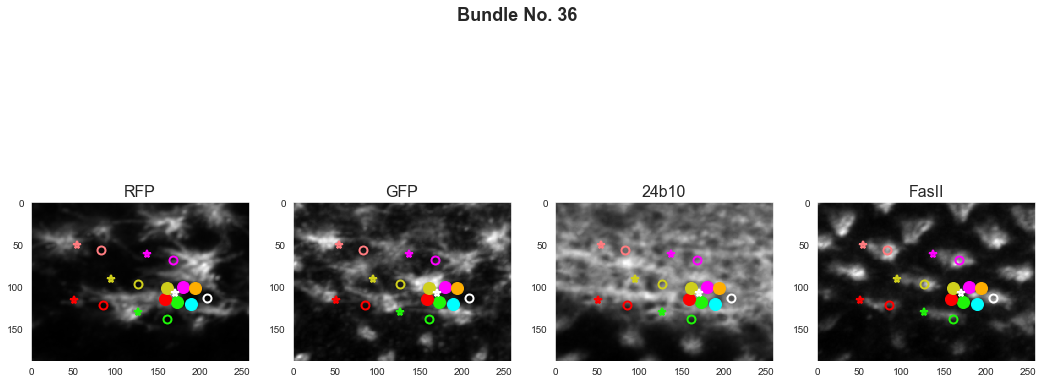

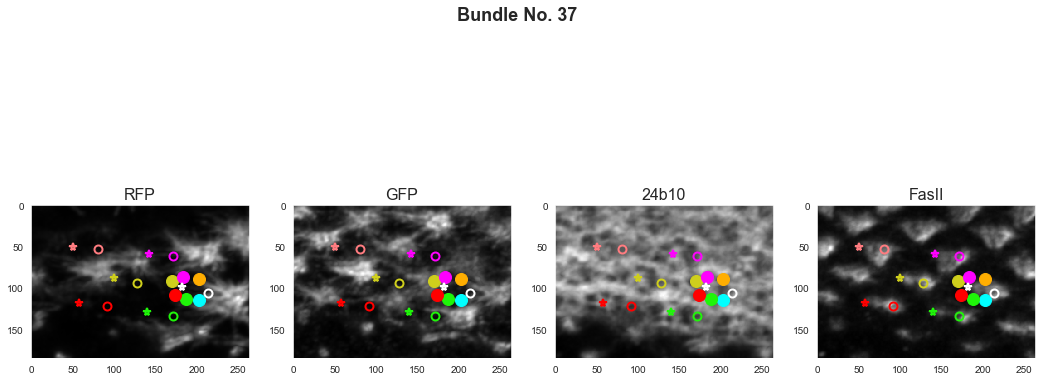

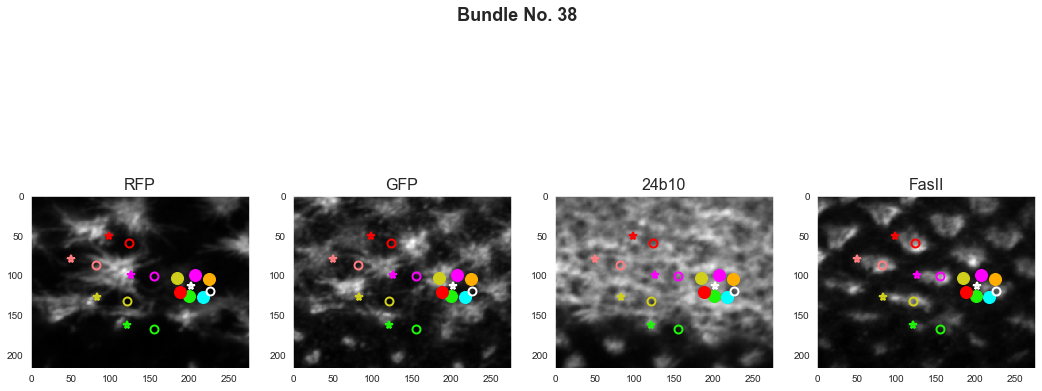

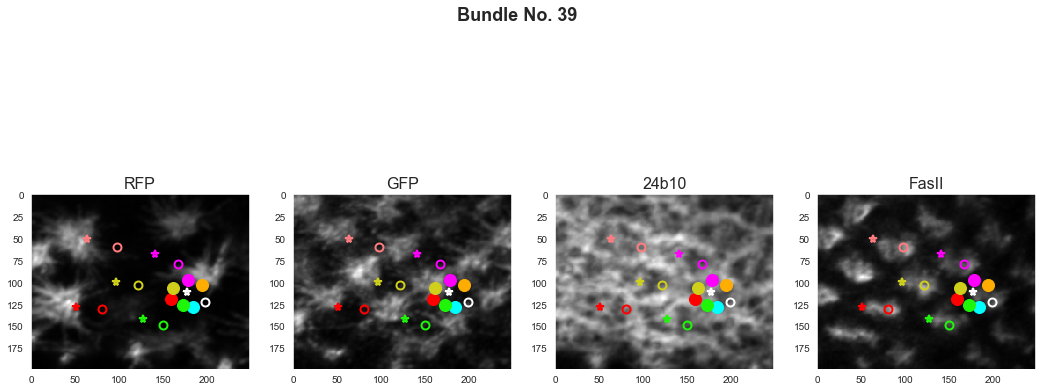

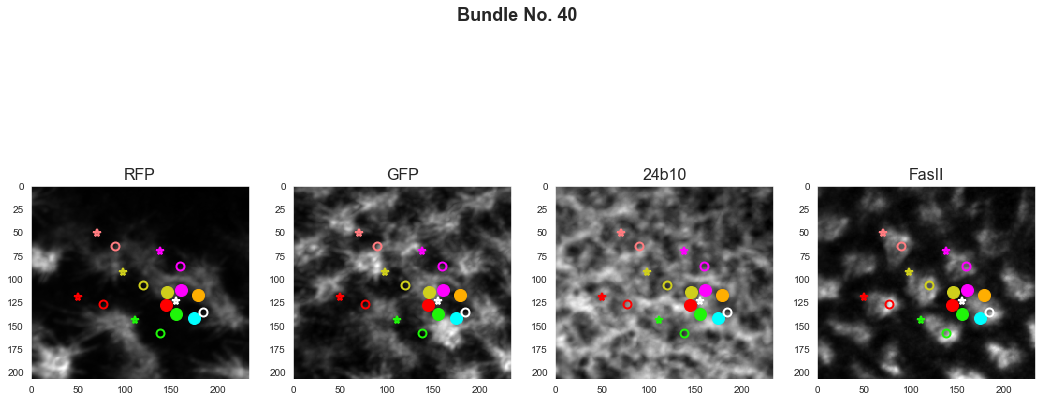

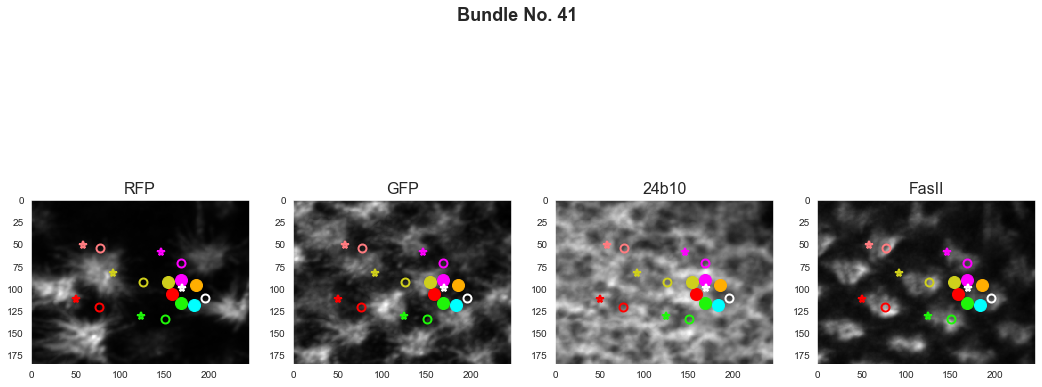

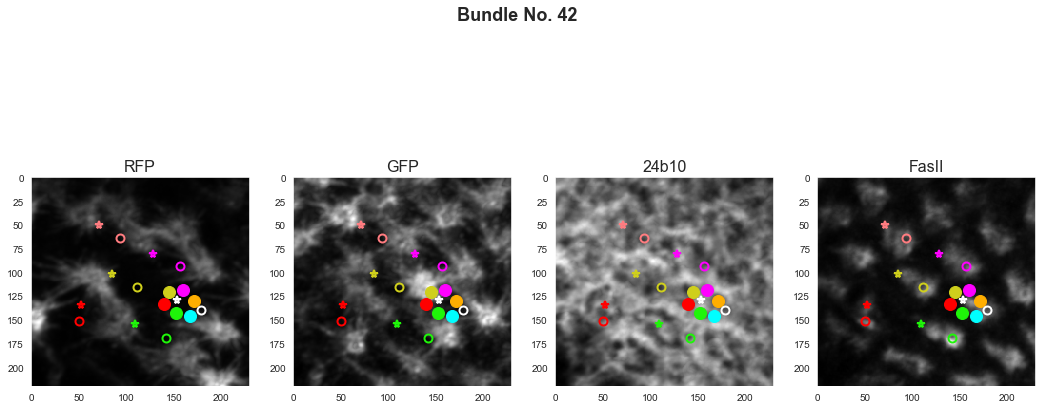

In [37]:
for ind, bundle_no in enumerate(annot_bundles_df.index):
    plotSettings = False, False, False, True #isPlotR3Line, isPlotR4Line, isPlotR4s, isLabelOff
    my_plot.plot_individual_bundles(bundle_no, bundles_df, image_norm, m2p_ratio[0], m2p_ratio[1], 
                                    num_subplots = image_norm.shape[-1], is_plot_r3_line = False, is_plot_r4_line = False, is_plot_r4 = False, is_label_off = True)
    plt.show()

In [ ]:
"""analyze images"""

In [ ]:
# ### parameters
# analysis_params_general = settings.analysis_params_general
# matching_info = settings.matching_info
# center_type = settings.analysis_params_general.center_type
# slice_type = settings.analysis_params_general.slice_type

# ### initialization
# print('-----' + image_name + '------')
# my_help.print_to_log('-----' + image_name + '------')
# matrix_y = analysis_params_general.num_angle_section + 2 * analysis_params_general.num_outside_angle + 1
# matrix_x = analysis_params_general.num_x_section + 1
# matrix_z = analysis_params_general.z_offset * 2 + 1
# num_norm_channels = image_norm.shape[-1]

# intensity_matrix = np.zeros((len(annot_bundles_df.index), num_norm_channels, matrix_y, matrix_x, matrix_z))
# intensity_matrix = intensity_matrix - 100

# params = [];
# rel_points = {}
# # rel_points = np.zeros((len(annot_bundles_df.index), 9))

# ### thresholds
# thr_otsu = np.zeros((num_norm_channels))
# thr_li = np.zeros((num_norm_channels))
# thr_isodata = np.zeros((num_norm_channels))
# time_start = time.time()
# # for channel_no in range(num_norm_channels):
# #     thr_otsu[channel_no] = filters.threshold_otsu(image_norm[:,:,:,channel_no])
# #     thr_li[channel_no] = filters.threshold_li(image_norm[:,:,:,channel_no])
# #     thr_isodata[channel_no] = filters.threshold_isodata(image_norm[:,:,:,channel_no])
# time_end = time.time()
# time_dur = time_end - time_start
# my_help.print_to_log("total time: " + str(time_dur))

# ### process
# for ind, bundle_no in enumerate(annot_bundles_df.index):
# # ind = 0
# # bundle_no = 1
#     print("Bundle No: " + str(bundle_no))
#     my_help.print_to_log("Bundle No: " + str(bundle_no))

#     ### targets info
#     ind_targets, coord_targets = my_help.get_target_coords(bundle_no, bundles_df)
#     ind_targets, coord_targets_extended = my_help.get_target_coords(bundle_no, bundles_df, return_type = 'extended')
#     coord_center = my_help.get_bundle_center(bundle_no, bundles_df)
#     coord_r4s = my_help.get_rx_coords(bundle_no, bundles_df, ind_targets, 4)
#     coord_r3s = my_help.get_rx_coords(bundle_no, bundles_df, ind_targets, 3)
#     coord_rcells = np.concatenate((coord_r4s, coord_r3s))

#     ### slice info
#     slice_zero_point = coord_targets[matching_info.target_id_to_index[7],:] # T3'
#     slice_one_point = coord_targets[matching_info.target_id_to_index[3],:] # T3

#     length_one_point = coord_targets[matching_info.target_id_to_index[4],:]

#     center_points = [coord_targets[0,:], coord_center[0,:]]

#     r_cell_nos = [4,4]


#     ### get slicing params and calculate matrix
#     bundle_params = [
#         bundle_no, 
#         ind_targets, 
#         coord_targets,
#         coord_targets_extended,
#         coord_center, 
#         slice_zero_point, 
#         slice_one_point, 
#         length_one_point, 
#         center_points[analysis_params_general.center_type], 
#         r_cell_nos[analysis_params_general.center_type]
#     ]
    
#     if(slice_type == 0):
#         pp_i, rel_points_i, fig = my_int.get_slice_params_v1(bundles_df, bundle_params, image_name, is_print = False, is_plot = True, is_save = True)
#     elif(slice_type == 1):
#         pp_i, rel_points_i, fig = my_int.get_slice_params_v3(bundles_df, bundle_params, image_name, is_print = False, is_plot = True, is_save = True)
#     plt.close(fig)
# # #     for slice_type in [0,1]:
# #     pp_1, rel_points_1 = my_int.get_slice_params_v1(bundles_df, bundle_params, is_print = False, is_plot = True)
# #     pp_2, rel_points_2 = my_int.get_slice_params_v3(bundles_df, bundle_params, is_print = False, is_plot = True)
#     params.append(pp_i)
#     rel_points[ind] = rel_points_i

#     # calculate matrix
#     time_start = time.time()
#     for channel_no in range(num_norm_channels):
#         my_help.print_to_log("Channle No: " + str(channel_no))
#         intensity_matrix[ind, channel_no,:,:,:] = my_int.get_intensity_matrix_new(pp_i, image_norm[:,:,:,channel_no])
#             # intensity_matrix[ind, channel_no,:,:,:] = np.random.randn(intensity_matrix[ind, channel_no,:,:,:].shape[0], intensity_matrix[ind, channel_no,:,:,:].shape[1], intensity_matrix[ind, channel_no,:,:,:].shape[2])
#         time_end = time.time()
#         time_dur = time_end - time_start
#         my_help.print_to_log("total time: " + str(time_dur))

In [ ]:
# paths = settings.paths
# analysis_params_general = settings.analysis_params_general
# matching_info = settings.matching_info
# num_norm_channels = image_norm.shape[-1]
# img_name = image_info[0]

# for ind, bundle_no in enumerate(annot_bundles_df.index):
#     print("Bundle No: ", bundle_no)
#     my_help.print_to_log("Bundle No: " + str(bundle_no))

#     category_id = annot_bundles_df.iloc[0]['CategoryID']
#     sample_id = annot_bundles_df.iloc[0]['SampleID']
#     region_id = annot_bundles_df.iloc[0]['RegionID']



#     ### targets info
#     ind_targets, coord_targets = my_help.get_target_coords(bundle_no, bundles_df)
#     coord_center = my_help.get_bundle_center(bundle_no, bundles_df)
#     coord_r4s = my_help.get_rx_coords(bundle_no, bundles_df, ind_targets, 4)
#     coord_r3s = my_help.get_rx_coords(bundle_no, bundles_df, ind_targets, 3)
#     coord_rs = np.concatenate((coord_r4s, coord_r3s))

#     ### parameters
#     pp_i = params[ind]
#     rel_points_i = rel_points[ind]

#     matrix = my_help.delete_zero_columns(intensity_matrix[ind, :, :, :, :], -100, 3)
#     if(len(matrix.flatten()) > 0):
# #         ## heat map
# #         plt.ioff()
# #         ori_x = np.round(np.linspace(0, analysis_params_general.radius_expanse_ratio[analysis_params_general.center_type], matrix.shape[2]), 2)
# #         tick_params = [2, 1, ori_x, 21] ### tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y
# #         for thr_function_ids in [0, 1, 2, 3]: # different thresholding methods
# #             thrs = np.zeros((num_norm_channels))
# #             if(thr_function_ids == 0):
# #                 thrs = np.zeros((num_norm_channels))
# #             elif(thr_function_ids == 1):
# #                 thrs = thr_otsu
# #             elif(thr_function_ids == 2):
# #                 thrs = thr_li
# #             elif(thr_function_ids == 3):
# #                 thrs = thr_isodata

# #             fig_name = f'{category_id}_s{sample_id}r{region_id}_bundle_no_{bundle_no}_{thr_function_ids}.png'
# #             fig_params = [pp_i, img_name, fig_name]
# #             plot_options = [thrs, thr_function_ids, num_norm_channels]
# #             fig = my_plot.plot_bundle_vs_matrix_all(bundle_no, bundles_df, image_norm, matrix, fig_params, tick_params, plot_options, is_label_off = True, is_save = True, is_true_x_tick = True, is_ori_tick = False)
# #             plt.close(fig)

#         ## polar plot
#         fig_params = [pp_i, img_name]
#         # plot_options = [True, True] # isLabelOff, isSave
#         for channel_no in range(num_norm_channels):
#             fig = my_plot.plot_polar(bundle_no, bundles_df, image_norm, channel_no, matrix, fig_params, rel_points_i, is_label_off = True, is_save = True, is_extended_target = True)
#             plt.close(fig)

#     else:
#         print("error! No intensity matrix calculated!")

In [ ]:
# t0_to_bundle_map = {}
# for ind in annot_df.index:
#     t0_to_bundle_map[annot_df.loc[ind, 'T0']] = annot_df.loc[ind, 'Bundle_No']
    

In [ ]:
# def get_bundles_info_v3(roi_df, annot_df, x_ratio, y_ratio, is_extended_target_list, is_print):
#     ### initialization
#     r_coords_list = []
#     for i in range(6):
#         for j in ['X', 'Y', 'Z']:
#             r_coords_list.append('coord' + '_' + j + '_R' + str(i+1))
#     center_coords_list = []
#     for j in ['X', 'Y', 'Z']:
#         center_coords_list.append('coord_' + j + '_Center')

#     ### get column names
#     qc_col_names = my_help.group_headers(annot_df, 'is_', True)
#     orient_col_names = my_help.group_headers(annot_df, 'Orientation_', True)
#     img_col_names = my_help.group_headers(annot_df, 'ID', True)
#     flag_col_names = my_help.group_headers(annot_df, 'if_', True)
#     bundles_cols = ['Bundle_No', 'num_Rcells'] + r_coords_list + center_coords_list + qc_col_names + orient_col_names + img_col_names + flag_col_names
    
#     ### hell-T0 map
#     t0_to_bundle_map = {}
#     for ind in annot_df.index:
#         t0_to_bundle_map[annot_df.loc[ind, 'T0']] = annot_df.loc[ind, 'Bundle_No']
    
#     ### create new dataframe
#     bundles_df = pd.DataFrame(columns = bundles_cols)

#     ### group ROI.csv according to label -- grouping individual roi together
#     roi_df_group = roi_df.groupby('Label') \
#         .agg({'X':'size', 'No':'mean'}) \
#         .rename(columns={'X':'count','No':'order'})
#     roi_df_group.sort_values('order', inplace=True) #sort according to order of roi added, so that ind of roi_df_group = bundle_no - 1
#     roi_df_group.reset_index(inplace=True)

#     ### update bundle coordinates
#     for ind in roi_df_group.index:
#         bundle_no = ind+1
#         print(bundle_no, roi_df_group.loc[ind, 'count'])

#         ## this ROI is a bundle
#         if(roi_df_group.loc[ind, 'count'] == 7):
#             print(f'{bundle_no}: bundle!')
#             df_tmp = pd.DataFrame(columns = bundles_cols)
#             df_tmp.loc[0,'Bundle_No'] = int(ind+1)
#             df_bd = roi_df.loc[roi_df['Label'] == list(roi_df_group.Label)[ind]]
#             df_tmp.loc[0,'num_Rcells'] = int(df_bd.shape[0])

#             ## R1- R6 coordinates
#             for i in range(6):
#                 df_tmp.loc[0,['coord_X_R' + str(i+1)]] = float(df_bd.loc[df_bd.index[i], 'X'])
#                 df_tmp.loc[0,['coord_Y_R' + str(i+1)]] = float(df_bd.loc[df_bd.index[i], 'Y'])
#                 df_tmp.loc[0,['coord_Z_R' + str(i+1)]] = float(df_bd.loc[df_bd.index[i], 'Slice'])

#             ## center of bundle coordinates
#             df_tmp.loc[0,'coord_X_Center'] = float(df_bd.loc[df_bd.index[6], 'X'])
#             df_tmp.loc[0,'coord_Y_Center'] = float(df_bd.loc[df_bd.index[6], 'Y'])
#             df_tmp.loc[0,'coord_Z_Center'] = float(df_bd.loc[df_bd.index[6], 'Slice'])

#             bundles_df = bundles_df.append(df_tmp, ignore_index=True, sort=True)

#         ## this ROI is a target of an annotated bundle
#         elif(roi_df_group.loc[ind, 'count'] == 1 and ind+1 in t0_to_bundle_map.keys()):
#             print(f'{bundle_no}: T0 of {t0_to_bundle_map[ind+1]}!')
#             df_tmp = pd.DataFrame(columns = bundles_cols)
#             df_tmp.loc[0,'Bundle_No'] = int(ind+1)
#             df_bd = roi_df.loc[roi_df['Label'] == list(roi_df_group.Label)[ind]]
                        
#             ## target coordinates
#             df_tmp.loc[0,'coord_X_T0'] = float(df_bd.loc[df_bd.index[0], 'X'])
#             df_tmp.loc[0,'coord_Y_T0'] = float(df_bd.loc[df_bd.index[0], 'Y'])
#             df_tmp.loc[0,'coord_Z_T0'] = float(df_bd.loc[df_bd.index[0], 'Slice'])
# #             print(df_tmp.loc[0,'coord_X_T0'])

#             bundles_df = bundles_df.append(df_tmp, ignore_index=True, sort=True)
        
#         ## this ROI is a target on its own
#         elif(roi_df_group.loc[ind, 'count'] == 2):
#             print(f'{bundle_no}: Target!')
#             df_tmp = pd.DataFrame(columns = bundles_cols)
#             df_tmp.loc[0,'Bundle_No'] = int(ind+1)
#             df_bd = roi_df.loc[roi_df['Label'] == list(roi_df_group.Label)[ind]]
                        
#             ## target coordinates
#             df_tmp.loc[0,'coord_X_T0'] = float(df_bd.loc[df_bd.index[0], 'X'])
#             df_tmp.loc[0,'coord_Y_T0'] = float(df_bd.loc[df_bd.index[0], 'Y'])
#             df_tmp.loc[0,'coord_Z_T0'] = float(df_bd.loc[df_bd.index[0], 'Slice'])
            
#             ### center coordinates
#             df_tmp.loc[0,'coord_X_Center'] = float(df_bd.loc[df_bd.index[1], 'X'])
#             df_tmp.loc[0,'coord_Y_Center'] = float(df_bd.loc[df_bd.index[1], 'Y'])
#             df_tmp.loc[0,'coord_Z_Center'] = float(df_bd.loc[df_bd.index[1], 'Slice'])
            
#             bundles_df = bundles_df.append(df_tmp, ignore_index=True, sort=True)

#         else:
#             print(f'ERROR! Bundle No. {ind+1} count incorrect!')
    
#     bundles_df = bundles_df.set_index('Bundle_No')
    
#     ### get center for target Ts:
#     for ind in t0_to_bundle_map.keys():
#         print(ind, t0_to_bundle_map[ind])
#         bundles_df.loc[ind,'coord_X_Center'] = bundles_df.loc[t0_to_bundle_map[ind],'coord_X_Center']
#         bundles_df.loc[ind,'coord_Y_Center'] = bundles_df.loc[t0_to_bundle_map[ind],'coord_Y_Center']
#         bundles_df.loc[ind,'coord_Z_Center'] = bundles_df.loc[t0_to_bundle_map[ind],'coord_Z_Center']

#     ## update target & quality-control info
#     print("---annot_df---")
#     my_help.print_to_log("---annot_df---")

#     for ind in annot_df.index:

#         bundle_no = annot_df.iloc[ind]['Bundle_No'].astype(int)
#         print(bundle_no)
#         my_help.print_to_log(str(bundle_no))

#         ### target info
#         if(is_extended_target_list):
#             bundles_df.loc[bundle_no, 'TargetNo_T3'] = annot_df.loc[ind,'T3'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T4'] = annot_df.loc[ind,'T4'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T5'] = annot_df.loc[ind,'T5'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T2'] = annot_df.loc[ind,'T2'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T1'] = annot_df.loc[ind,'T1'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T6'] = annot_df.loc[ind,'T6'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T20'] = annot_df.loc[ind,'T20'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T50'] = annot_df.loc[ind,'T50'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T40'] = annot_df.loc[ind,'T40'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T30'] = annot_df.loc[ind,'T30'].astype(int)
#         else:
#             bundles_df.loc[bundle_no, 'TargetNo_T3'] = annot_df.loc[ind,'T3'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T4'] = annot_df.loc[ind,'T4'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T5'] = annot_df.loc[ind,'T5'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T2'] = annot_df.loc[ind,'T2'].astype(int)
#             bundles_df.loc[bundle_no, 'TargetNo_T7'] = annot_df.loc[ind,'T7'].astype(int)

#         ### T0 coordinates
#         ind_t0 = annot_df.loc[ind,'T0'].astype(int)
#         bundles_df.loc[bundle_no, 'coord_X_T0'] = bundles_df.loc[ind_t0, 'coord_X_T0']
#         bundles_df.loc[bundle_no, 'coord_Y_T0'] = bundles_df.loc[ind_t0, 'coord_Y_T0']
#         bundles_df.loc[bundle_no, 'coord_Z_T0'] = bundles_df.loc[ind_t0, 'coord_Z_T0']

#         ### quality control and flag info
#         bundles_df.loc[bundle_no, orient_col_names] = annot_df.loc[ind, orient_col_names]    
#         bundles_df.loc[bundle_no, qc_col_names] = annot_df.loc[ind, qc_col_names].astype(int)
#         bundles_df.loc[bundle_no, flag_col_names] = annot_df.loc[ind, flag_col_names].astype(int)

#         ### category, sample and region info.
#         bundles_df.loc[bundle_no, img_col_names] = annot_df.loc[ind, img_col_names] 

#     ### X,Y coordinates from microns to pixels
#     x_coord_cols = my_help.group_headers(bundles_df, 'coord_X', True)
#     bundles_df.loc[:,x_coord_cols] = bundles_df.loc[:,x_coord_cols] * x_ratio
#     y_coord_cols = my_help.group_headers(bundles_df, 'coord_Y', True)
#     bundles_df.loc[:,y_coord_cols] = bundles_df.loc[:,y_coord_cols] * y_ratio
    
#     return bundles_df

In [ ]:
# def get_target_coords(bundle_no, bundles_df, **kwarg):
#     ### unravel params
#     if('return_type' in kwarg.keys()):
#         return_type = kwarg['return_type']
#     else:
#         return_type = 'target'
#     if('dim' in kwarg.keys()):
#         dim = kwarg['dim']
#     else:
#         dim = 2
#     index_to_target_id = matching_info.index_to_target_id
    
#     if(return_type == 'target'):
#         if(dim == 2):
#             coord_cols_list = ['coord_X_T0', 'coord_Y_T0']
#         elif(dim == 3):
#             coord_cols_list = ['coord_X_T0', 'coord_Y_T0', 'coord_Z_T0']
#     elif(return_type == 'extended'):
#         if(dim == 2):
#             coord_cols_list = ['coord_X_Center', 'coord_Y_Center']
#         elif(dim == 3):
#             coord_cols_list = ['coord_X_Center', 'coord_Y_Center', 'coord_Z_Center']
    
#     target_inds = []
#     target_coords = np.zeros((len(index_to_target_id), dim))
    
#     if('TargetNo_T0' not in bundles_df.columns):
#         target_inds.append(bundle_no)
#     else:
#         target_inds.append(bundles_df.loc[bundle_no,'TargetNo_T'])
#     target_coords[0,:] = bundles_df.loc[bundle_no, coord_cols_list].to_numpy()

#     for i in range(1,len(target_coords)):
#         target_inds.append(int(bundles_df.loc[bundle_no,'TargetNo_T' + str(index_to_target_id[i])]))
#         target_coords[i,:] = bundles_df.loc[target_inds[i], coord_cols_list].to_numpy()

#     return target_inds, target_coords